# ESN波形分類2（前処理とESNパラメータ）

## はじめに

ESN波形分類1では、ほぼ理想的な条件で波形分類を行いました。

ここでは、より実践に近い、少し条件の厳しい波形を用い、前処理やパラメータを調整することで性能がどのように改善されるかを確認します。演習は一つずつ順に実行してみてください。内容は初期設定の数値を変更するだけの、簡単なものになっています。

## 演習１

何も変更せずに、すべてのセルの実行を行い、ESN波形分類1で行った内容と同様の評価結果になることを確認してください。前回可視化していた部分は省略し、複数のセルに分けていた部分を統合しています。

例えば、以下のような高い正解率の結果になっていればOKです

```
Train accuracy: 0.9666666666666667
Test  accuracy: 0.9333333333333333
[[ 8  0  2]
 [ 0 10  0]
 [ 0  0 10]]
```

## 演習２

`初期設定`で`AMP_VOLATILITY`を`0.1`から`0.7`に変更して、すべてのセルを実行後、正解率が悪化することを確認してください。

例えば、以下のように、先ほどの正解率から比べて低くなっていることが確認できます。

```
Train accuracy: 0.725
Test  accuracy: 0.5666666666666667
[[3 0 7]
 [0 8 2]
 [4 0 6]]
```

正解率が悪化した理由は、波形の振幅変動が大きくなり、クラスごとの特徴が不安定になったためです。

AMP_VOLATILITY を大きくすると、同じクラスでも波形の形状やスケールのばらつきが増え、学習時に得られた特徴と推論時の特徴が一致しにくくなります。その結果、リザバー状態が安定せず、分類境界があいまいになり、誤分類が増加します。

💡AMP_VOLATILITY は今回の演習用に用意したパラメータであり、特に理解したり覚えたりする必要はありません。

## 演習３

`初期設定`で`USE_NORMALIZATION`を`False`から`True`に変更して、すべてのセルを実行後、正解率が改善することを確認してください。

例えば、以下のような高い正解率の結果になっていればOKです

```
Train accuracy: 1.0
Test  accuracy: 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
```

正解率が高くなった理由は、正規化によって振幅のばらつきが抑えられ、波形の時間的な特徴に集中できるようになったためです。その結果、学習と推論で安定したリザバー状態が得られ、高い分類精度につながりました。

例えば以下の波形の例では、正規化前（青）は振幅の大きさが一定でないのに対し、正規化後（オレンジ）では波形の値が −1.0〜1.0 の範囲に収まるようになります。このように正規化によってスケール差が取り除かれ、リザバーは振幅ではなく時間的な形状の違いに注目できるようになります

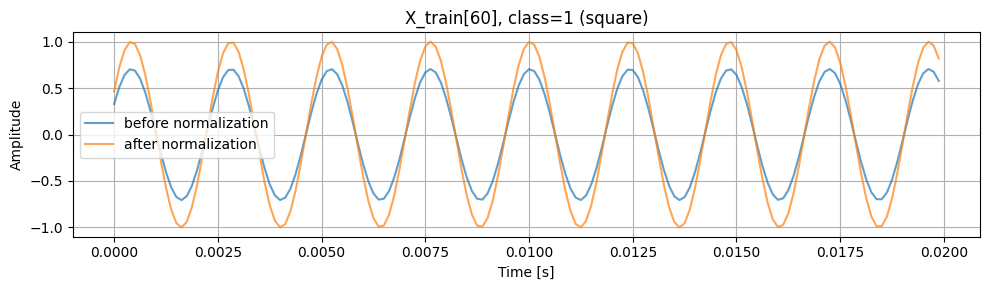

💡USE_NORMALIZATION は今回の演習用に用意したパラメータであり、特に理解したり覚えたりする必要はありません。正規化の有無が性能に影響する、という点だけ押さえてください。

## 演習４

初期設定でUSE_SMOOTHINGをFalseからTrueに変更して、すべてのセルを実行後、正解率が悪化することを確認してください。

例えば、以下のように、先ほどの正解率から比べて低くなっていることが確認できます。

```
Train accuracy: 0.6333333333333333
Test  accuracy: 0.6666666666666666
[[7 0 3]
 [2 5 3]
 [2 0 8]]
```

正解率が悪化した理由は、平滑化によって波形がなめらかになりすぎ、クラス判別に必要な細かな違いまで失われたためです。その結果、各クラスの波形が似通ってしまい、モデルが区別しにくくなって誤分類が増えました。

※見た目の波形は大きく変わっていないように見えますが、分類に必要な情報は失われています

💡USE_SMOOTHING は今回の演習用に用意したパラメータであり、特に理解したり覚えたりする必要はありません。

## 演習５

`初期設定`で`N_RESERVOIR`を`20`から`200`に変更して、すべてのセルを実行後、正解率が少し改善することを確認してください。今までに比べて実行時間が長くなります。

例えば、以下のように、先ほどの正解率から比べて少し高くなっていることが確認できます。

```
Train accuracy: 0.75
Test  accuracy: 0.8
[[ 6  0  4]
 [ 0 10  0]
 [ 2  0  8]]
```

正解率が高くなった理由は、リザバーのノード数が増え、入力の時系列パターンをより豊かに表現できるようになったためです。ノード数が少ない場合は、異なる波形でも内部状態が似てしまい、区別が難しくなることがあります。ノード数を増やすと状態表現の自由度が上がり、クラスごとの違いを捉えやすくなります。

ただし、ノード数が増えるほど計算量も増えるため、実行時間は長くなります。

## 初期設定

In [ ]:
# @markdown 初回は内容を変更せず、そのまま実行ボタンを押してください。

# 振幅の変動率を定義 (例: 0.1 なら ±10% の変動)
AMP_VOLATILITY = 0.1 # @param {type:"number"}

# 正規化の実施フラグ
USE_NORMALIZATION = False # @param ["False", "True"] {type:"raw"}

# 平滑化（情報削り）の実施フラグ
USE_SMOOTHING = False # @param ["False", "True"] {type:"raw"}

# リザバーのノード数（ニューロン数）
N_RESERVOIR = 20 # @param {type:"number"}

# スペクトル半径
SPECTRAL_RADIUS = 0.9 # @param {type:"number"}

# リーク率
LEAK_RATE = 0.3 # @param {type:"number"}

# 結合密度
DENSITY = 0.1 # @param {type:"number"}

# @markdown 💡Colaboratoryメニューにある `▷ すべてのセルを実行` をクリックして実行するのが便利です。


## データセット（正弦波、矩形波、三角波）の作成と分割

In [ ]:
# @markdown  学習データを作成と分割を実施します


#----------------------------------------------------------------------------------------------------
# 学習データ作成
#----------------------------------------------------------------------------------------------------

import numpy as np
from scipy import signal

np.random.seed(42)

DATA_NUM = 50
kinds = ["sine", "square", "triangle"]
fs = 8000
duration = 0.5
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

def gen(freq, phase, amp, kind):
    if kind=="sine": return amp*np.sin(2*np.pi*freq*t+phase)
    if kind=="square": return amp*signal.square(2*np.pi*freq*t+phase)
    if kind=="triangle": return amp*signal.sawtooth(2*np.pi*freq*t+phase, 0.5)

X = []
y = []

for cls, kind in enumerate(kinds):
    for _ in range(DATA_NUM):
        freq  = 440*np.random.uniform(0.9, 1.1)
        phase = np.random.uniform(0, 2*np.pi)
        amp = np.random.uniform(1.0 - AMP_VOLATILITY, 1.0 + AMP_VOLATILITY)

        wave = gen(freq, phase, amp, kind)

        # 平滑化処理（情報削り）
        if USE_SMOOTHING:
            k = 15
            wave = np.convolve(wave, np.ones(k)/k, mode="same")

        X.append(wave)
        y.append(cls)

X = np.array(X)
y = np.array(y)

print(f'{DATA_NUM}個 × {len(kinds)}種類の波形をランダムに作成しました。')
print(f'周波数・位相・振幅をわずかにランダムに変えたデータになっています。')
print(f'サンプリング周波数が {fs}Hz、長さが {duration}秒 という設定のため、１波形あたり {int(fs*duration)} サンプルのデータがあります。')


#----------------------------------------------------------------------------------------------------
# データ分割（train / test）
#----------------------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split


print("データ:", X.shape)

num_classes = len(np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20%をテストに
    random_state=42,
    stratify=y               # ここで各クラスの比率を保つ
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train class counts:", np.bincount(y_train))
print("Test  class counts:", np.bincount(y_test))
print("")
print("データが訓練Trainと評価用Testに分割されました")

## 正規化

In [ ]:
# @markdown  学習データを正規化します

# 正規化（Train のみ）

X_train_old = X_train.copy()   # ← 正規化前を保存

if USE_NORMALIZATION:
    max_abs = np.max(np.abs(X_train), axis=1, keepdims=True) + 1e-8
    X_train = X_train / max_abs
    print("X_train のみ正規化しました。")
else:
    print("初期設定に従い、正規化は行っていません。")

In [ ]:
# @markdown 波形をランダムに１つ選択し、正規化前と後の波形を表示します（実行のたびに変わります）

# 正規化の可視化

# =========================
# 正規化前後を0.02秒だけ表示
# =========================
import matplotlib.pyplot as plt
import numpy as np

def show_sample_norm(idx):
    """
    正規化前後の波形を、先頭0.02秒だけ比較表示
    正規化OFF時は同一波形を表示（ラベルのみ区別）
    """
    wave_raw = X_train_old[idx]

    if USE_NORMALIZATION:
        wave_norm = X_train[idx]
    else:
        wave_norm = wave_raw  # 正規化していない場合は同一

    label = y[idx]
    label_names = {0: "sine", 1: "square", 2: "triangle"}
    name = label_names.get(label, f"class {label}")

    n_show = int(fs * 0.02)
    time_axis = np.arange(n_show) / fs

    plt.figure(figsize=(10, 3))
    plt.plot(time_axis, wave_raw[:n_show],
             label="before normalization", alpha=0.7)
    plt.plot(time_axis, wave_norm[:n_show],
             label="after normalization", alpha=0.7)

    plt.title(f"X_train[{idx}], class={label} ({name})")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# =========================
# ランダムに1つ表示
# =========================

idx = np.random.randint(len(X_train))
show_sample_norm(idx)

if USE_NORMALIZATION:
    print('波形が -1.0～1.0 の振幅になっていることが確認できました。')
else:
    print("正規化は行っていません（同一波形を表示しています）。")


## Echo State Networkで学習と性能評価

In [ ]:
# @markdown ESNでの学習と性能評価まで一気に実施します

#----------------------------------------------------------------------------------------------------
# W_inとWの作成
#----------------------------------------------------------------------------------------------------

class SimpleESN:
    def __init__(self, n_inputs=1, n_reservoir=500,
                 spectral_radius=0.9, input_scaling=0.8,
                 leak_rate=0.3, ridge_reg=1e-6,
                 density=0.1,
                 seed=0):

        self.n_inputs = n_inputs
        self.n_reservoir = n_reservoir
        self.spectral_radius = spectral_radius
        self.input_scaling = input_scaling
        self.leak_rate = leak_rate
        self.ridge_reg = ridge_reg
        self.density = density

        rng = np.random.default_rng(seed)

        # =========================
        # 入力＋バイアス → リザバー
        # =========================
        self.W_in = (rng.uniform(-1, 1, (n_reservoir, n_inputs)) * self.input_scaling)
        self.b_in = (rng.uniform(-1, 1, (n_reservoir,)) * self.input_scaling)

        # =========================
        # リザバー内部結合（density 対応）
        # =========================
        W = rng.uniform(-1, 1, (n_reservoir, n_reservoir))

        # 疎結合マスク
        mask = rng.uniform(0, 1, (n_reservoir, n_reservoir)) < density
        W = W * mask

        # =========================
        # スペクトル半径を調整
        # =========================
        eigvals = np.linalg.eigvals(W.astype(np.float64))
        sr = np.max(np.abs(eigvals))

        # sr=0 防止（density が極端に小さい場合）
        if sr == 0:
            raise ValueError("spectral radius is zero. Increase density.")

        self.W = W * (self.spectral_radius / sr)

        self.W_out = None  # 学習時に決まる

# W_inとWの作成
esn = SimpleESN(
    n_inputs=1,
    n_reservoir=N_RESERVOIR,
    spectral_radius=SPECTRAL_RADIUS,
    input_scaling=0.8,
    leak_rate=LEAK_RATE,
    ridge_reg=1e-5,
    density=DENSITY,
    seed=1234
)

W_in = esn.W_in  # (N_RESERVOIR, 1)
b_in = esn.b_in  # (N_RESERVOIR,)
W = esn.W  # (N_RESERVOIR, N_RESERVOIR)
n_res, n_col = W_in.shape

print("以下の設定値でWinとWを作成しました。")
print(f"・リザバーのノード数（N_RESERVOIR）: {N_RESERVOIR}")
print(f"・スペクトル半径（SPECTRAL_RADIUS）: {SPECTRAL_RADIUS}")
print(f"・リーク率（LEAK_RATE）: {LEAK_RATE}")
print(f"・結合密度（DENSITY）: {DENSITY}")


#----------------------------------------------------------------------------------------------------
# u_seqを入力とし、W_inとWを使って各時刻のリザバー状態statesを作成
#----------------------------------------------------------------------------------------------------

def _forward_states(self, u_seq):
    """
    1サンプル分の時系列 u_seq (T,) を受け取り、
    各時刻のリザバー状態 x(t) を返す: (T, n_reservoir)
    """
    T = len(u_seq)
    x = np.zeros(self.n_reservoir)
    states = np.zeros((T, self.n_reservoir), dtype=np.float32)

    for t in range(T):
        u = u_seq[t]
        # 入力＋バイアス
        u_vec = np.array([u], dtype=np.float32) # n_inputs=1想定
        pre_activation = (self.W_in @ u_vec) + self.b_in + (self.W @ x)
        x_new = np.tanh(pre_activation)
        # リーク付き更新
        x = (1 - self.leak_rate) * x + self.leak_rate * x_new
        states[t] = x

    return states

SimpleESN._forward_states = _forward_states

print("各時刻のリザバー状態statesを作成しました。")


#----------------------------------------------------------------------------------------------------
# W_outを学習して作成
#----------------------------------------------------------------------------------------------------

def fit(self, X_seq, y_labels, num_classes):
    """
    X_seq: (N, T) の時系列データ（固定長）
    y_labels: (N,) のラベル (0,1,2)
    ※各フレームに「その発話のラベル」を付けて学習する
    """
    N, T = X_seq.shape

    # ---- 全フレームを縦に積む（N*T 行）----
    total_frames = N * T

    # R: (N*T, n_res)
    R = np.zeros((total_frames, self.n_reservoir), dtype=np.float32)

    # Y: (N*T, num_classes)
    Y = np.zeros((total_frames, num_classes), dtype=np.float32)

    row = 0
    for i in range(N):
        states = self._forward_states(X_seq[i])   # (T, n_res)
        R[row:row+T] = states

        # その発話ラベルを全フレームに付与
        Y[row:row+T, y_labels[i]] = 1.0
        row += T

    # ---- リッジ回帰 ----
    Rt = R.T
    I = np.eye(self.n_reservoir, dtype=np.float32)
    A = Rt @ R + self.ridge_reg * I
    B = Rt @ Y
    self.W_out = np.linalg.solve(
        A.astype(np.float64),
        B.astype(np.float64)
    ).astype(np.float32)

SimpleESN.fit = fit


esn.fit(X_train, y_train, num_classes)

print(f"学習が完了しました。")


#----------------------------------------------------------------------------------------------------
# 推論
#----------------------------------------------------------------------------------------------------

def predict_proba(self, X_seq):
    """
    X_seq: (N, T)
    戻り値: (N, num_classes) （線形出力）
    ※各発話について「全フレームの線形出力を平均して」返す
    """
    N, T = X_seq.shape
    Y_lin = np.zeros((N, self.W_out.shape[1]), dtype=np.float32)  # (N, num_classes)

    for i in range(N):
        states = self._forward_states(X_seq[i])   # (T, n_reservoir)

        # 各フレームの線形出力: (T, num_classes)
        Z = states @ self.W_out

        # 発話内で集約（平均）
        Y_lin[i] = Z.mean(axis=0)

    return Y_lin

SimpleESN.predict_proba = predict_proba

def predict(self, X_seq):
    """
    クラスID (argmax) を返す
    """
    Y_lin = self.predict_proba(X_seq)
    return np.argmax(Y_lin, axis=1)

SimpleESN.predict = predict


#----------------------------------------------------------------------------------------------------
# 性能評価
#----------------------------------------------------------------------------------------------------
print("性能評価を実施します。")


# 推論前の正規化（学習時と同じルール）
if USE_NORMALIZATION:
    max_abs = np.max(np.abs(X_test), axis=1, keepdims=True) + 1e-8
    X_test = X_test / max_abs
    print("X_test 正規化しました。")
else:
    print("初期設定に従い、X_testの正規化は行っていません。")

# 予測
y_pred = esn.predict(X_test)

# 正解率
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = esn.predict(X_train)
y_test_pred = y_pred #既に実施済

print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test  accuracy:", accuracy_score(y_test,  y_test_pred))

# 混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)